### State Schema With DataClasses
Let’s break down **State Schema** and **StateSchema with DataClass** in LangGraph — essential for managing and orchestrating data flow between nodes in a structured and controlled way.

---

## ✅ What is a State Schema?

A **State Schema** is the blueprint or structure that defines **what data is available** and **how it flows between nodes** in a LangGraph.

### 🔧 Purpose:

* Ensures **type safety** and **clarity**
* Controls **which variables are shared** across the graph
* Prevents accidental overwriting or leaking of unwanted data

---

## 🧪 What is `StateSchema` with `@dataclass`?

LangGraph lets you define a state using Python’s `@dataclass`, which makes it easy to:

* Declare all state variables
* Add type annotations (like `str`, `int`, `Optional[str]`)
* Provide defaults if needed

### 📦 Example:

```python
from langgraph.graph import StateSchema
from dataclasses import dataclass
from typing import Optional

@dataclass
class MyState(StateSchema):
    user_input: str
    summary: Optional[str] = None
```

* `user_input`: required
* `summary`: optional, can be populated later by a node

---

## 🔁 How Each Node Communicates with State Schema

Each **node**:

1. **Reads from the state**: accesses the current data available
2. **Writes to the state**: updates values which will be available to the next nodes

LangGraph enforces that each node:

* **Declares its input/output keys**
* Can **only modify certain fields**, making flows **predictable and modular**

### 🧩 Node Example:

```python
def summarize_node(state: MyState) -> dict:
    summary = some_summarization_function(state.user_input)
    return {"summary": summary}
```

LangGraph uses this return to update the `state.summary`.

---

## 🔄 Flow Illustration

```
StateSchema (MyState):
    user_input: "Explain LangGraph"
    summary: None

--> summarize_node:
    Reads: user_input
    Writes: summary

New State:
    user_input: "Explain LangGraph"
    summary: "LangGraph is a..."

--> next_node...
```

---

## ✅ Benefits of Using StateSchema with @dataclass

| Feature             | Why it matters                                              |
| ------------------- | ----------------------------------------------------------- |
| 📦 Structured State | Keeps all shared data organized                             |
| 🛡️ Type Safety     | Prevents invalid data (e.g., assigning int to string)       |
| 🧩 Predictable Flow | Each node knows exactly what to expect and modify           |
| 📚 Self-Documenting | Easy for others to understand what data exists in the graph |


we can use the TypedDict class from python's typing module.

It allows you to specify keys and their corresponding value types.

But, note that these are type hints.

They can be used by static type checkers (like mypy) or IDEs to catch potential type-related errors before the code is run.

But they are not enforced at runtime!

## Below are 2 Ways to Create State Schema
1. using TypedDict
2. using DataClas

In [2]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    """
    TypeDictState is a TypedDict that defines the structure of a dictionary
    that contains the state of a type.
    """
    name: str
    game: Literal["cricket", "badminton"]

In [3]:
def play_game(state:TypedDictState):
    print("---Play Game node has been called--")
    return {"name":state['name'] + " want to play "}

def cricket(state:TypedDictState):
    print("-- Cricket node has been called--")
    return {"name":state["name"] + " cricket","game":"cricket"}

def badminton(state:TypedDictState):
    print("-- badminton node has been called--")
    return {"name":state["name"] + " badminton","game":"badminton"}

In [4]:
import random
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

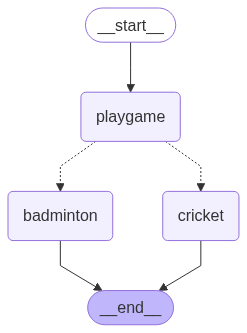

In [5]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [6]:
graph.invoke({"name":"Ravi"})

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'Ravi want to play  cricket', 'game': 'cricket'}

### DataClasses
Python's dataclasses provide another way to define structured data.

Dataclasses offer a concise syntax for creating classes that are primarily used to store data.

In [7]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    """
    DataClassState is a dataclass that defines the structure of a dictionary
    that contains the state of a type.
    """
    name: str
    game: Literal["cricket", "badminton"]

In [8]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " want to play "}

def cricket(state:DataClassState):
    print("-- Cricket node has been called--")
    return {"name":state.name + " cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("-- badminton node has been called--")
    return {"name":state.name + " badminton","game":"badminton"}

In [9]:
import random
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

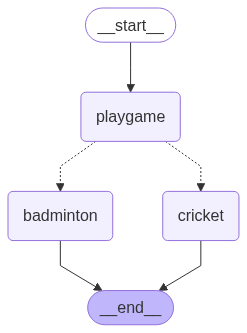

In [10]:

builder=StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke(DataClassState(name="Ravi",game="cricket"))

---Play Game node has been called--
-- badminton node has been called--


{'name': 'Ravi want to play  badminton', 'game': 'badminton'}

## StateSchema using Pydantic

In [12]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [13]:
import logfire

logfire.configure(token=os.getenv("LOGFIRE_KEY"))
# set logfire project
logfire.instrument_pydantic()

In [14]:
## StateSchema using Pydantic
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel, ValidationError, StrictInt
from pydantic.types import StringConstraints
from typing import Annotated

ConstrainedStr = Annotated[str, StringConstraints(min_length=1, max_length=10, strip_whitespace=True)]

class DemoString(BaseModel):
    """
    DemoString is a Pydantic model that defines the structure of a dictionary
    that contains the state of a type.
    """
    name: str
    age: StrictInt
    designation: ConstrainedStr
    
def create_demo():
    try:
        # Incorrect data (int instead of str)
        demo = DemoString(name="", age=25, designation="Dev")
        logfire.info(f"Created DemoString: {demo}")
        print(demo)
    except ValidationError as e:
        print("Error")
        logfire.exception("Pydantic validation failed: {error}", error=str(e))

create_demo()

05:55:14.991 Pydantic DemoString validate_python


Logfire project URL: ]8;id=369161;https://logfire-us.pydantic.dev/lalraviranjan/starter-project\https://logfire-us.pydantic.dev/lalraviranjan/starter-project]8;;\

05:55:16.208 Created DemoString: name='' age=25 designation='Dev'
name='' age=25 designation='Dev'


In [15]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel, ValidationError

class State(BaseModel):
    """
    State is a Pydantic model that defines the structure of a dictionary
    that contains the state of a type.
    """
    name: str